In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

Welcome to JupyROOT 6.30/04


In [2]:
FILE_PATH = "../Dati/Run_Natrigger512_Data_5_17_2024_Ascii_0000.root" #Relative file path
file1 = uproot.open(FILE_PATH)


In [3]:
nch=file1["tree"]["ch"].array()
print(nch)

[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [4]:

baselines = file1["tree"]["base"].array()
charges = file1["tree"]["charge"].array()
amp = file1["tree"]["amp"].array()
lead_edge = file1["tree"]["letime"].array()
t_edge = file1["tree"]["tetime"].array()
channel= file1["tree"]["ch"].array()
waveform = file1["tree"]["pshape"].array()

In [5]:
N_ev=len(charges[:, 0])
print(N_ev)



30000


42
1473


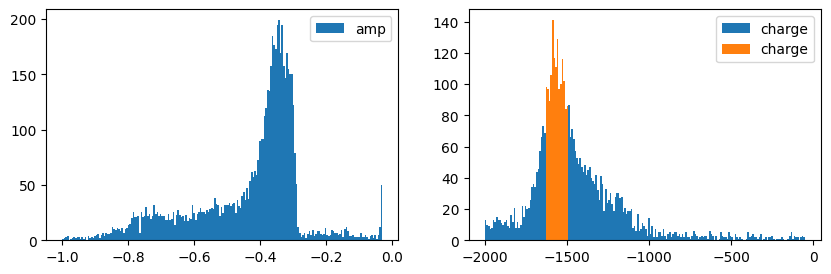

In [6]:
channel=15
bins = 200

right = [8,14,7,7,14,8,8,8,8,0,7,10]
left = [6,14,5,6,5,3,4,5,5,0,6,4]
#right = np.repeat(20,12)
#left = np.repeat(20,12)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
a=plt.hist(amp[:, channel-4], bins=bins, range=(-1, -0.03), label='amp')
plt.legend()
plt.subplot(1,2,2)
b=plt.hist(charges[:, channel-4], bins=bins, range=(-2000, -50), label='charge')


print(np.argmax(b[0]))
idx=np.argmax(b[0])
mask=np.where( (charges[:,channel-4]>b[1][idx-left[channel-4]]) &( charges[:, channel-4]<b[1][idx+right[channel-4]]))[0]
print(len(mask))

b1=plt.hist(charges[:, channel-4][mask], bins=bins, range=(-2000, -50), label='charge')
plt.legend()



In [7]:
limL=np.zeros(16)
limR=np.zeros(16)
for channel in range(4,16):
    try:
        b=np.histogram(charges[:, channel-4], bins=bins, range=(-2000, -50))
        idx=np.argmax(b[0])
        limL[channel]=b[1][idx-left[channel-4]]
        limR[channel]=b[1][idx+right[channel-4]]

    except IndexError:
        limL[channel]=b[1][idx]
        limR[channel]=b[1][idx+1]
        continue

canale=[4,5,6,7,8,9,10,11,12,13,14,15]
coppia=np.array([ [4,5], [6,7], [8,9], [10,11],[14,15] ])
#coppia=np.array([[4,5]])
firstch = coppia[:,0]
secondch = coppia[:,1]

map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print("mappa:",map)

firstch_limits=[ [limL[coppia[i][0]], limR[coppia[i][0]]] for i in range(len(coppia))]
secondch_limits=[[limL[coppia[i][1]], limR[coppia[i][1]]] for i in range(len(coppia))]

print("Primo limite:",firstch_limits)
print("Secondo limite:",secondch_limits)

mappa: [-1 -1 -1 -1  0  1  2  3  4  5  6  7 -1 -1  8  9]
Primo limite: [[-791.0, -654.5], [-888.5, -771.5], [-1015.25, -830.0], [-479.0, -362.0], [-1181.0, -1054.25]]
Secondo limite: [[-1395.5, -1122.5], [-1278.5, -1151.75], [-557.0, -449.75], [-791.0, -664.25], [-1629.5, -1493.0]]


/tmp/ipykernel_59060/375166755.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map[i]=np.where(coppia.flatten()==i)[0]


In [8]:
paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []


paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1, channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])

#import gc
#del waveform100
#gc.collect()
whichpair = np.array(whichpair)



1659


(array([194.,   0.,   0., 264.,   0.,   0., 818.,   0.,   0., 383.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

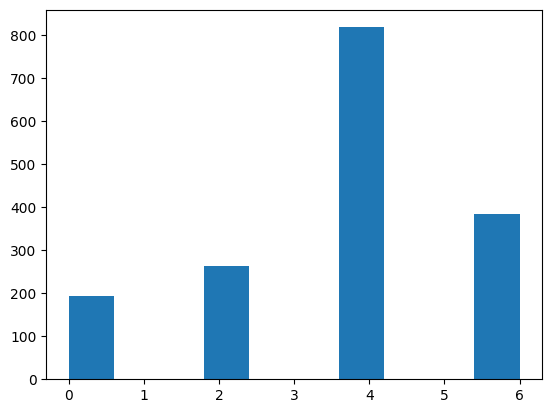

In [9]:
print(len(paired_amp_1))
plt.hist(whichpair)


n = 7, 	 thr = -0.12	
channel: 0 2.7352853007462965 -3.34891046919984
channel: 2 2.6202088821934644 -2.793552113226951
channel: 4 2.6306975889342086 -1.4827770337773432
channel: 6 2.6122184757632625 2.2509968954692177
n = 7, 	 thr = -0.11	
channel: 0 2.731046501926144 -3.32659093559692
channel: 2 2.61282053516111 -2.7976488920552103
channel: 4 2.6154888201335313 -1.4647762373893978
channel: 6 2.611976626954326 2.2531528653062494
n = 7, 	 thr = -0.1	
channel: 0 2.7455610711784417 -3.307875210488663
channel: 2 2.593291297678609 -2.7779243624870746
channel: 4 2.6071751463422035 -1.4334035949495563
channel: 6 2.6158912740456004 2.273588751655351
n = 7, 	 thr = -0.09	
channel: 0 2.7495330678053915 -3.2886471752494737
channel: 2 2.5625747737614217 -2.7805384879951838
channel: 4 2.5809501078945596 -1.4317243732409894
channel: 6 2.568169406373626 2.2632322657140045
n = 8, 	 thr = -0.12	
channel: 0 2.736086235212861 -3.411183506541317
channel: 2 2.6436524795696905 -2.8371277487205093
channel: 4

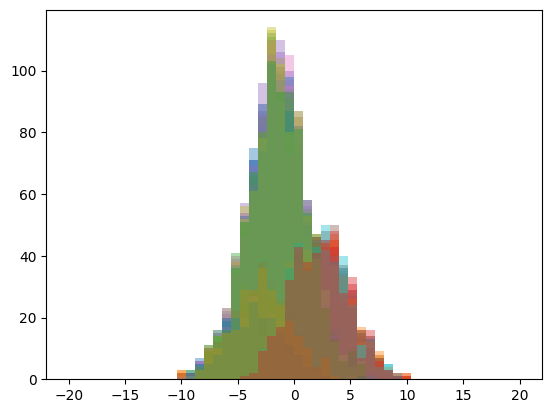

In [10]:
i = 0
j = 0
sampling=1.875
shiftR=8
shiftL=2
mean = [7,8,9,10]
tresh = [-0.12,-0.11,-0.10,-0.09]
stds = np.zeros([len(mean), len(tresh),4])

for n in mean:
    for thr in tresh:
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledge= np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            #ledges1[evt]=np.interp(threshold,  [new_wf_1[evt][ledge-shift], new_wf_1[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_1[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges1[evt] = np.poly1d(coef)(threshold) 
            ledge = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]
            #ledges2[evt]=np.interp(threshold,  [new_wf_2[evt][ledge-shift], new_wf_2[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_2[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges2[evt] = np.poly1d(coef)(threshold)
        

        timeres=ledges1-ledges2
        for select in range(0,8,2):
            std = []
            mask=np.where((np.abs(timeres*sampling) < 10)&(whichpair==select))[0]
            plt.hist(timeres[mask]*sampling, bins=50, range=(-20,20),alpha=0.4)
            print("channel:",select,np.std(sampling*timeres[mask]), np.mean(sampling*timeres[mask]))
            std.append(np.std(sampling*timeres[mask]))
        stds[i][j] = std
        j += 1
    j = 0
    i += 1


#4.1669487180823195evt = 5

Text(0, 0.5, 'std [ns]')

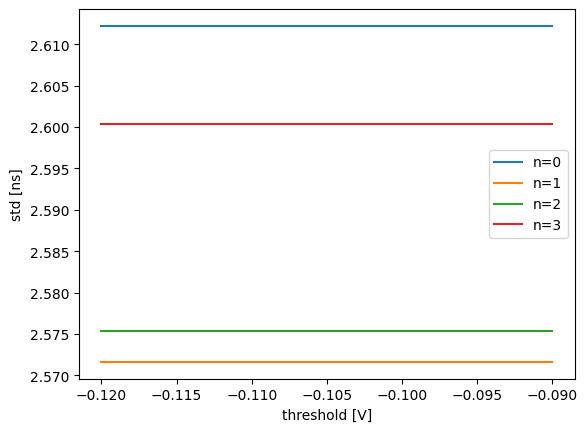

In [11]:
select = 0
for n in range(len(tresh)):
    plt.plot(tresh, stds[n,:][select], label = f'{n=}')
plt.legend()
plt.xlabel("threshold [V]")
plt.ylabel("std [ns]")

-6.129394390615843


(220.0, 400.0)

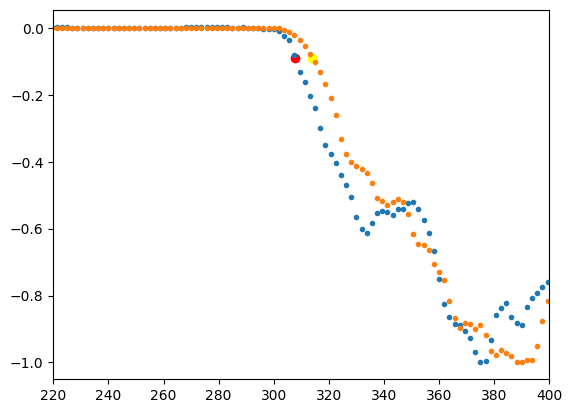

In [12]:
evt = 2
plt.plot(np.arange(0, 1024)*sampling, new_wf_1[evt],'.')
plt.plot(np.arange(0, 1024)*sampling, new_wf_2[evt],'.')
plt.scatter(ledges1[evt]*sampling,threshold,c="red")
plt.scatter(ledges2[evt]*sampling,threshold,c="yellow")
print((ledges1[evt]-ledges2[evt])*sampling)
plt.xlim(220,400)